![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 30 - CNN Architectures</center>
### <center> Transfer Learning</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/30_CnnArchitectures/MainTransferLearning.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [3]:
#-- Imports:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#-- torch:
import torch

For Colab users:

In [4]:
!wget https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/MachineLearningMethod/30_CnnArchitectures/TransferLearningAux.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
#-- Record figures during training:
from TransferLearningAux import TrainLoop, ValidationLoop, TrainModel 

### Load dataset:
https://www.kaggle.com/puneet6060/intel-image-classification

In [6]:
#-- Colab:
#!unzip "./drive/My Drive/Colab Notebooks/111880_269359_bundle_archive.zip"

In [7]:
import torchvision
import torchvision.transforms as transforms

vMean = np.array([0.48501961, 0.45795686, 0.40760392])
vStd  = np.array([0.22899216, 0.224     , 0.225     ])

oTransforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=vMean, std=vStd),
])

trainPath = '../../data/111880_269359_bundle_archive/seg_train/seg_train'
testPath  = '../../data/111880_269359_bundle_archive/seg_test/seg_test'

oTrainSet = torchvision.datasets.ImageFolder(root=trainPath, transform=oTransforms)
oTestSet  = torchvision.datasets.ImageFolder(root=testPath,  transform=oTransforms)
oTrainSet.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

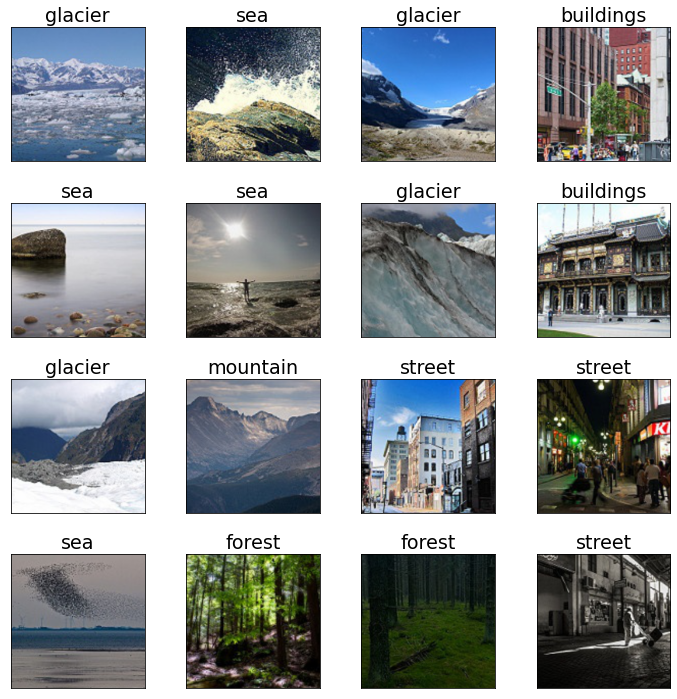

In [8]:
oTrainDL = torch.utils.data.DataLoader(oTrainSet, batch_size=16, shuffle=True)
mImages, vLabels = next(iter(oTrainDL))
mImages = mImages
vLabels = vLabels
fig, _  = plt.subplots(4, 4, figsize=(10,10))
for ii, ax in enumerate(fig.axes):
    ax.imshow(np.clip(mImages[ii].numpy().transpose((1,2,0)) * vStd[None,None,:] + vMean[None,None,:], 0, 1))
    ax.set_title(oTrainSet.classes[vLabels[ii]])
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

### Train a new ResNet (without transfer learning):

In [9]:
import torch.nn as nn
import torchsummary

def GetModel():
    return torchvision.models.resnet50(pretrained=False, num_classes=6)

torchsummary.summary(GetModel(), (3, 224, 224)); print()

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        128
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]         16,38

In [10]:
#-- Data loaders:
batchSize = 32
oTrainDL  = torch.utils.data.DataLoader(oTrainSet, shuffle=True,  batch_size=batchSize,   num_workers=2)
oTestDL   = torch.utils.data.DataLoader(oTestSet,  shuffle=False, batch_size=2*batchSize, num_workers=2)

In [11]:
#-- Device:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

<IPython.core.display.Javascript object>


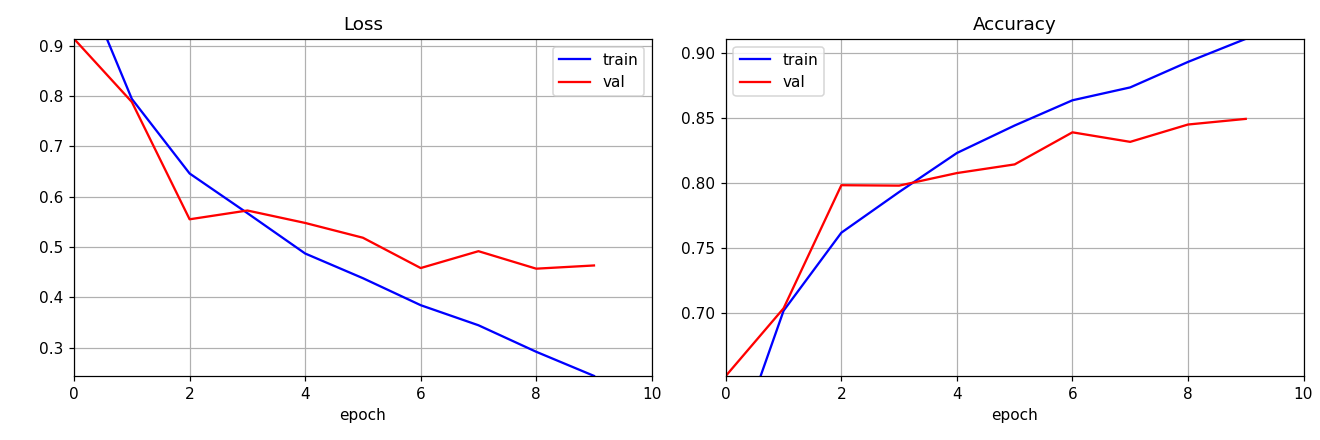

Epoch   0: | Train loss: 1.07118 | Val loss: 0.91418 | Train Accuracy: 0.5759 | Val Accuracy: 0.6520 | epoch time: 216.975 | <-- Checkpoint!
Epoch   1: | Train loss: 0.79467 | Val loss: 0.78858 | Train Accuracy: 0.7022 | Val Accuracy: 0.7040 | epoch time: 226.404 | <-- Checkpoint!
Epoch   2: | Train loss: 0.64628 | Val loss: 0.55516 | Train Accuracy: 0.7621 | Val Accuracy: 0.7987 | epoch time: 218.412 | <-- Checkpoint!
Epoch   3: | Train loss: 0.56738 | Val loss: 0.57260 | Train Accuracy: 0.7934 | Val Accuracy: 0.7983 | epoch time: 221.686 |
Epoch   4: | Train loss: 0.48707 | Val loss: 0.54788 | Train Accuracy: 0.8234 | Val Accuracy: 0.8080 | epoch time: 218.480 | <-- Checkpoint!
Epoch   5: | Train loss: 0.43794 | Val loss: 0.51845 | Train Accuracy: 0.8446 | Val Accuracy: 0.8147 | epoch time: 217.317 | <-- Checkpoint!
Epoch   6: | Train loss: 0.38422 | Val loss: 0.45813 | Train Accuracy: 0.8640 | Val Accuracy: 0.8393 | epoch time: 218.563 | <-- Checkpoint!
Epoch   7: | Train loss: 0.34

In [14]:
%matplotlib notebook

import torch.optim as optim

oModel    = GetModel().to(device)
oOptim    = optim.AdamW(oModel.parameters(), lr=1e-4, betas=(0.9, 0.99), weight_decay=2e-4)
LossFunc  = nn.CrossEntropyLoss()
numEpochs = 10
TrainModel(oModel, oTrainDL, oTestDL, LossFunc, numEpochs, oOptim)

### Use a pretrained ResNet (transfer learning):

In [15]:
def GetPretrainedModel():
    oModel = torchvision.models.resnet50(pretrained=True)
    #-- freeze weights:
    for mParam in oModel.parameters():
        mParam.requires_grad = False
        
    #-- Replace classifier head:
    dIn = oModel.fc.in_features
    oModel.fc = nn.Sequential(
        nn.Linear(dIn, 100), nn.ReLU(),
        nn.Linear(100, 6)
    )
    
    return oModel

torchsummary.summary(GetPretrainedModel(), (3, 224, 224)); print()

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (4,096)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]  

<IPython.core.display.Javascript object>


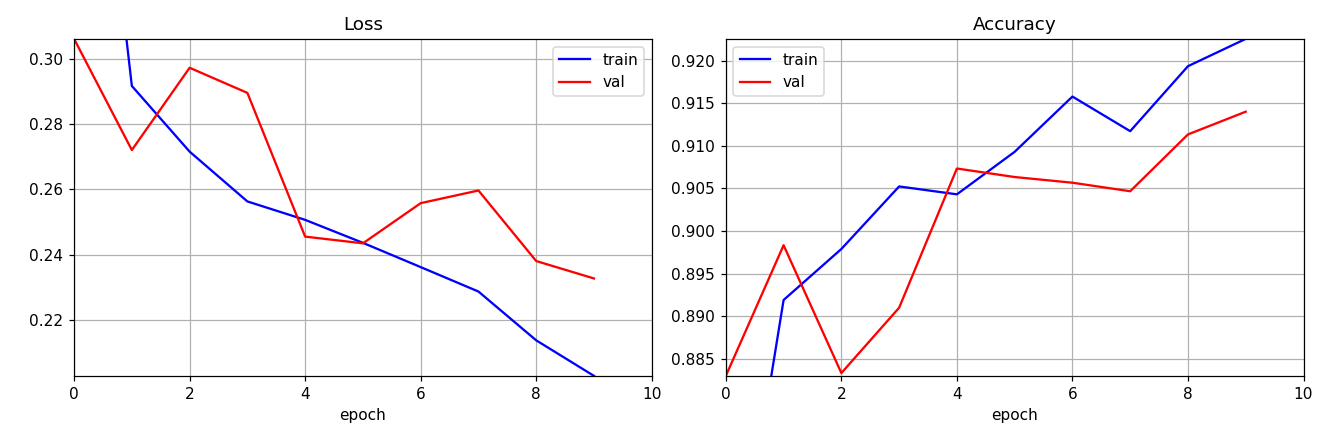

Epoch   0: | Train loss: 0.44544 | Val loss: 0.30609 | Train Accuracy: 0.8501 | Val Accuracy: 0.8830 | epoch time: 85.014 | <-- Checkpoint!
Epoch   1: | Train loss: 0.29168 | Val loss: 0.27205 | Train Accuracy: 0.8919 | Val Accuracy: 0.8983 | epoch time: 87.781 | <-- Checkpoint!
Epoch   2: | Train loss: 0.27157 | Val loss: 0.29724 | Train Accuracy: 0.8979 | Val Accuracy: 0.8833 | epoch time: 86.574 |
Epoch   3: | Train loss: 0.25632 | Val loss: 0.28955 | Train Accuracy: 0.9052 | Val Accuracy: 0.8910 | epoch time: 85.903 |
Epoch   4: | Train loss: 0.25067 | Val loss: 0.24555 | Train Accuracy: 0.9043 | Val Accuracy: 0.9073 | epoch time: 85.170 | <-- Checkpoint!
Epoch   5: | Train loss: 0.24364 | Val loss: 0.24349 | Train Accuracy: 0.9093 | Val Accuracy: 0.9063 | epoch time: 83.153 |
Epoch   6: | Train loss: 0.23621 | Val loss: 0.25579 | Train Accuracy: 0.9158 | Val Accuracy: 0.9057 | epoch time: 83.133 |
Epoch   7: | Train loss: 0.22873 | Val loss: 0.25967 | Train Accuracy: 0.9117 | Val 

In [16]:
%matplotlib notebook

oModel    = GetPretrainedModel().to(device)
oOptim    = optim.AdamW(oModel.parameters(), lr=5e-4, betas=(0.9, 0.99), weight_decay=2e-4)
LossFunc  = nn.CrossEntropyLoss()
numEpochs = 10
TrainModel(oModel, oTrainDL, oTestDL, LossFunc, 10, oOptim)